In [68]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 

In [69]:
img = cv2.imread('diff_after_alignment.png')

(-0.5, 301.5, 408.5, -0.5)

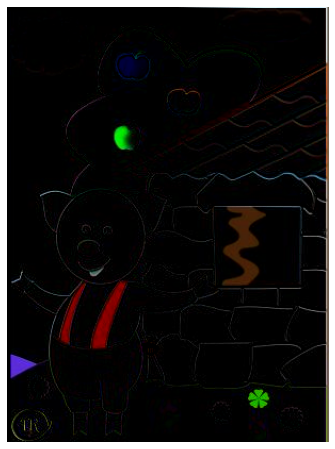

In [70]:
plt.figure(figsize = (10,8))
plt.imshow(img[:,:,::-1])
plt.axis('off')

- Approach-1: remove the edges 
- Aprroach-2: select the colored pixels 
- Approach-3: select contours with area threshold 

## Contours

In [71]:
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 20, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

(-0.5, 301.5, 408.5, -0.5)

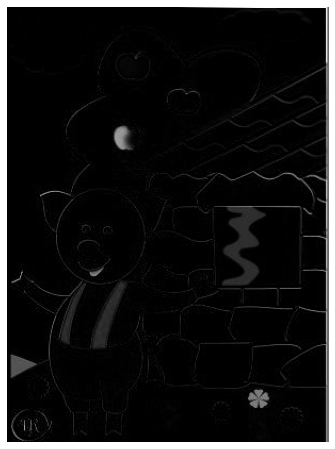

In [72]:
plt.figure(figsize = (10,8))
plt.imshow(imgray, cmap="gray")
plt.axis('off')

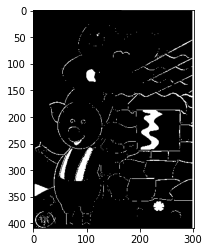

In [73]:
plt.imshow(thresh, cmap="gray")

In [74]:
print("Number of contours - ", len(contours))

Number of contours -  467


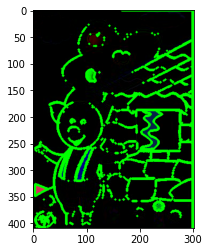

In [75]:
plt.imshow(cv2.drawContours(np.copy(img), contours, -1, (0,255,0), 3))

In [76]:
area_list = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    area_list.append(area)

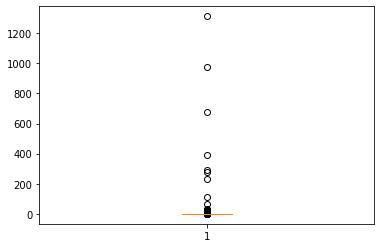

In [77]:
plt.boxplot(area_list)
plt.show()

In [78]:
# filter contours on the basis of area
# from the above diagram we can try threshold as 1000
thrsh_area = 400
filtered_cnts = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area>thrsh_area:
        filtered_cnts.append(cnt)

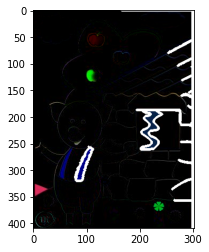

In [79]:
# print the selected cnts 
plt.imshow(cv2.drawContours(np.copy(img), filtered_cnts, -1, (255,255,255), 3))

In [80]:
len(filtered_cnts)

3

# SELECT COLOURED PIXELS

(-0.5, 301.5, 408.5, -0.5)

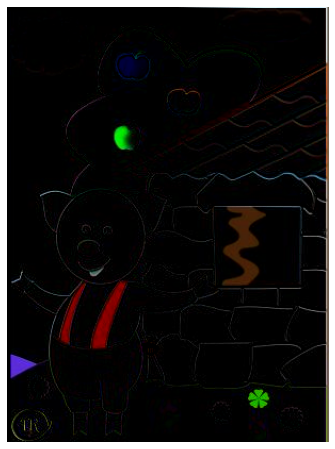

In [81]:
plt.figure(figsize = (10,8))
plt.imshow(img[:,:,::-1])
plt.axis('off')

In [82]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [83]:
h,s,v = cv2.split(img_hsv)

(-0.5, 301.5, 408.5, -0.5)

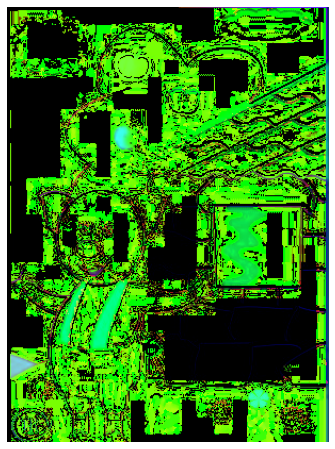

In [84]:
plt.figure(figsize = (10,8))
plt.imshow(img_hsv)
plt.axis('off')

In [85]:
img_bgr = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)

(-0.5, 301.5, 408.5, -0.5)

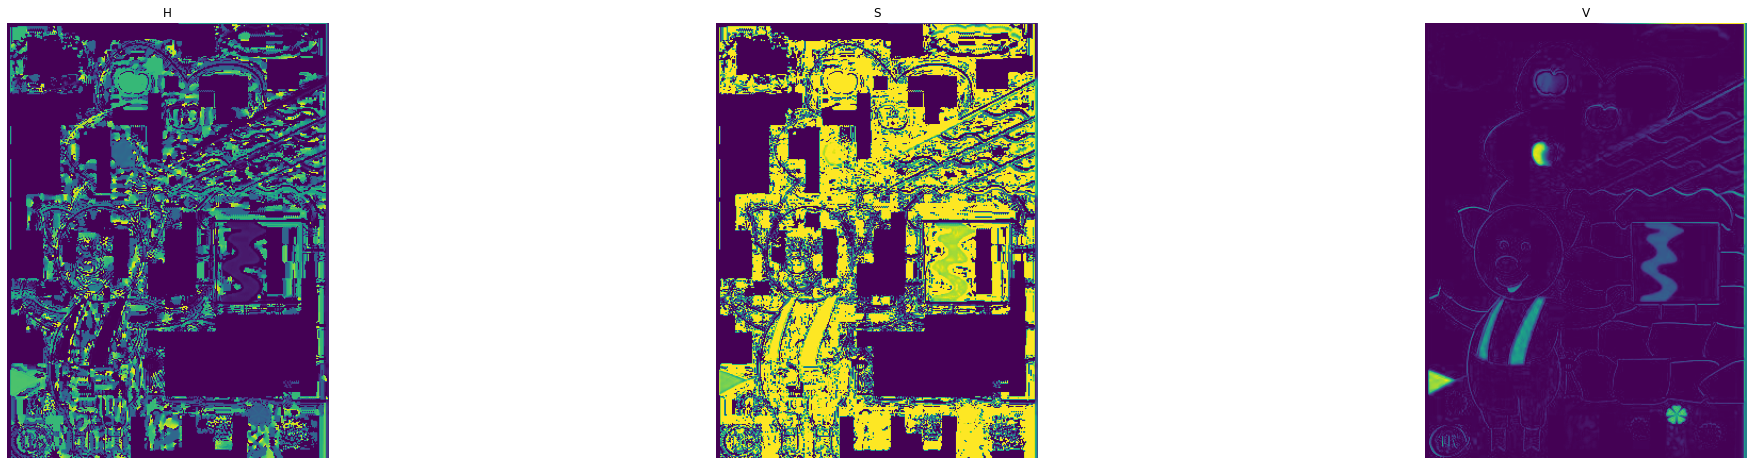

In [87]:
plt.figure(figsize = (36,8))
plt.subplot(131)
plt.imshow(h)
plt.title("H")
plt.axis('off')

plt.subplot(132)
plt.imshow(s)
plt.title("S")
plt.axis('off')

plt.subplot(133)
plt.imshow(v)
plt.title("V")
plt.axis('off')

In [88]:
print("maximum value of v - ",np.max(v))
print("Min value of v is - ",np.min(v))

maximum value of v -  255
Min value of v is -  0


(-0.5, 301.5, 408.5, -0.5)

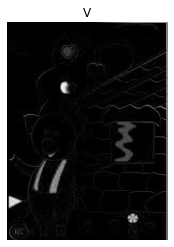

In [89]:
plt.imshow(v, cmap="gray")
plt.title("V")
plt.axis('off')

(array([114145.,   3424.,   2215.,    603.,   1078.,    973.,    373.,
           269.,    277.,    161.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

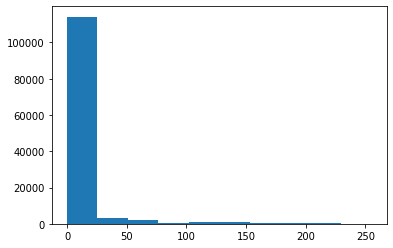

In [90]:
plt.hist(np.ravel(v))

In [152]:
ret, thresh1 = cv2.threshold(v, 127, 255, cv2.THRESH_BINARY)

(-0.5, 301.5, 408.5, -0.5)

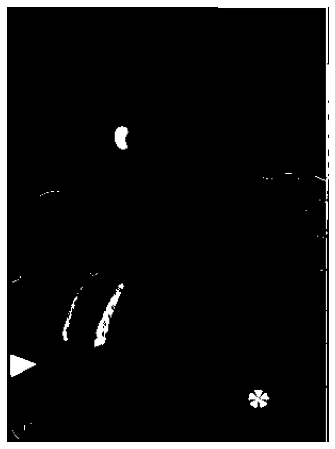

In [153]:
plt.figure(figsize = (10,8))
plt.imshow(thresh1, cmap="gray")
plt.axis('off')

In [154]:
contours, hierarchy = cv2.findContours(thresh1,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [155]:
len(contours)

53

## morphological operations 

In [156]:
# define the kernel
kernel = np.ones((5, 5), np.uint8)

In [157]:
# erode 
erosion = cv2.erode(thresh1, kernel,
                    iterations=1)

(-0.5, 301.5, 408.5, -0.5)

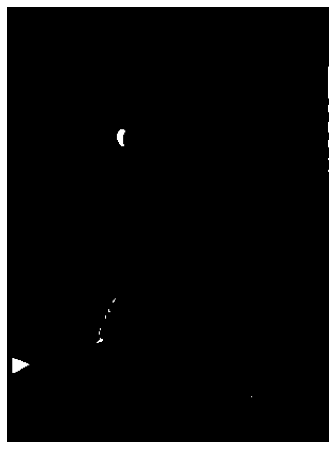

In [158]:
plt.figure(figsize = (10,8))
plt.imshow(erosion, cmap="gray")
plt.axis('off')

In [159]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

In [160]:
# erode 
erosion = cv2.erode(thresh1, kernel,
                    iterations=1)

(-0.5, 301.5, 408.5, -0.5)

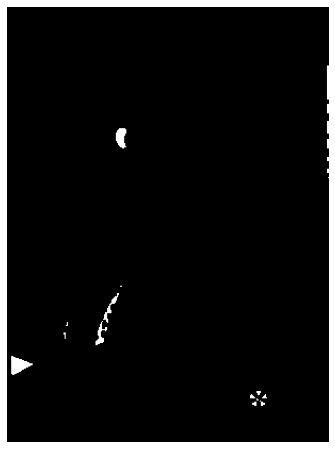

In [161]:
plt.figure(figsize = (10,8))
plt.imshow(erosion, cmap="gray")
plt.axis('off')

In [162]:
# erode 
dilated = cv2.dilate(thresh1, kernel,
                    iterations=1)

(-0.5, 301.5, 408.5, -0.5)

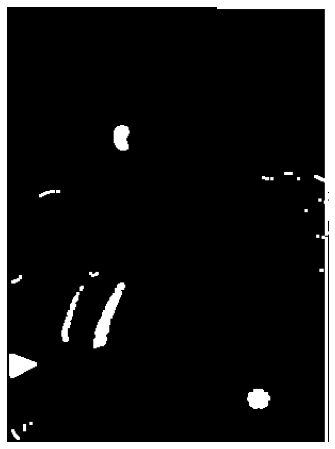

In [163]:
plt.figure(figsize = (10,8))
plt.imshow(dilated, cmap="gray")
plt.axis('off')

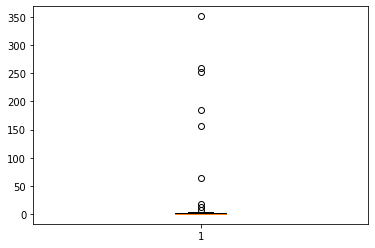

In [164]:
# we will now filter the favourable contours on the basis of area

# get the distribution of area 
area_list = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    area_list.append(area)

plt.boxplot(area_list)
plt.show()

In [165]:
# filter on the basis of a threshold

In [166]:
def ifBorderCont(cnt,img):
    M = cv2.moments(cnt)
    x = int(M["m10"] / M["m00"])
    y = int(M["m01"] / M["m00"])
    h,w, _ = img.shape
    if x/w > 0.98:
        return True 
    elif x/w < 0.02:
        return True 
    elif y/h>0.98:
        return True 
    elif y/h < 0.02:
        return True 
    else:
        return False 

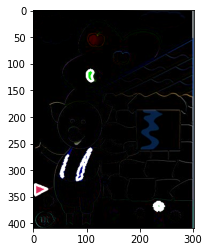

In [167]:
# filter contours on the basis of area
# from the above diagram we can try threshold as 1000
thrsh_area = 50
filtered_cnts = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area>thrsh_area and not ifBorderCont(cnt, img):
        filtered_cnts.append(cnt)

# print the selected cnts 
plt.imshow(cv2.drawContours(np.copy(img), filtered_cnts, -1, (255,255,255), 3))

In [168]:
len(filtered_cnts)

5

In [169]:
contours_poly = [None]*len(contours)
boundRect = [None]*len(contours)
centers = [None]*len(filtered_cnts)
radius = [None]*len(filtered_cnts)
for i, c in enumerate(filtered_cnts):
    contours_poly[i] = cv2.approxPolyDP(c, 3, True)
    boundRect[i] = cv2.boundingRect(contours_poly[i])
    centers[i], radius[i] = cv2.minEnclosingCircle(contours_poly[i])

In [170]:
# convert centers of type int from float 
centers_int = [(int(element[0]), int(element[1])) for element in centers]

In [171]:
result = np.copy(img)
for c,r in zip(centers_int, radius):
    cv2.circle(result, c, int(r) , (0,0,255), 2)

(-0.5, 301.5, 408.5, -0.5)

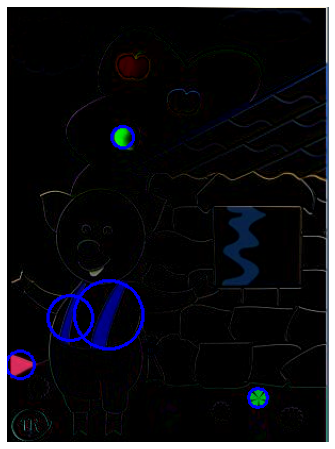

In [174]:
plt.figure(figsize = (10,8))
plt.imshow(result, cmap="gray")
plt.axis('off')